# Ising model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint, choice, random
from IPython.display import clear_output, display
%matplotlib inline

In [2]:
# Calculate the energy for a spin by summing over the neighbour spins
# grid: grid of spins
# x, y: coordinates
# N:    number of spins in each dimension
# J:    Ising model constant
# mu:    external magnetic field strength
def calculate_energy(grid, x, y, N, J, mu):
    return -J * grid[x, y] * (grid[x, (y+1)%N] +
                              grid[x, (y-1)%N] +
                              grid[(x+1)%N, y] +
                              grid[(x-1)%N, y]) - mu * grid[x, y]

# Calculate the total energy of the system
# grid: grid of spins
# J:    Ising model constant
def calculate_total_energy(grid, J, mu):
    N = grid.shape[0]
    E = np.zeros((N, N))
    for x in range(N):
        for y in range(N):
            E[x, y] = calculate_energy(grid, x, y, N, J, mu)

    return E
    
# Simulate the Ising Model using the Monte Carlo method
# T:    temperature of the system
# eq_T: equilibrium time of the system
# n_T:  number of "time" steps
# N:    number of spins in each dimension
def simulate(T, eq_T, n_T, N=16, J=1.0, mu=0.0):
    grid = choice([-1.0, 1.0], (N, N))
    magnetization, energy = np.zeros((n_T-eq_T, N, N)), np.zeros((n_T-eq_T, N, N))

    for t in range(n_T):
        x = randint(0, N)
        y = randint(0, N)
        E = calculate_energy(grid, x, y, N, J, mu)

        if E > 0 or random() < np.exp(2.0 * E / T):
            grid[x, y] = grid[x, y] * -1
        
        if t >= eq_T:
            magnetization[t-eq_T, :, :] = grid
            energy[t-eq_T, :, :] = calculate_total_energy(grid, J, mu)
            
    return magnetization, energy

In [6]:
temps = np.arange(1.6, 4.0, 0.05)
results = np.zeros((len(temps), 4, 2))
n_T = 10**5
equilibrium_time = int(n_T * 2 / 3)
N = 100
mu = 0.0

for i, T in enumerate(temps):
    clear_output(wait=True)
    print("{} of {}".format(i+1, len(temps)))
    
    simulation = simulate(T, equilibrium_time, n_T, mu=mu)    
    magnetizations = np.average(np.average(simulation[0], axis=1), axis=1)
    energies = np.average(np.average(simulation[1], axis=1), axis=1)
    results[i, 0, 0] = np.abs(np.average(magnetizations))
    results[i, 0, 1] = np.std(np.abs(magnetizations))
    results[i, 1, 0] = np.average(energies)
    results[i, 1, 1] = np.std(energies)
    
    spec_heat = np.zeros(N)
    susceptibility = np.zeros(N)
    
    # resample the energies to calculate the specific heat for each timestep
    for n in range(N):
        random_indices = np.random.sample(len(energies)) * len(energies)
        E = energies[random_indices.astype(int)]
        spec_heat[n] = (np.average(E**2.0) - np.average(E)**2.0) / T**2.0
    
    # resample the data of the magnetizations to calculate the susceptibility for each timestep
    for n in range(N):
        random_indices = np.random.sample(len(magnetizations)) * len(magnetizations)
        M = magnetizations[random_indices.astype(int)]
        susceptibility[n] = (np.average(M**2.0) - np.average(M)**2.0) / T
    
    results[i, 2, 0] = np.average(spec_heat)
    results[i, 2, 1] = np.sqrt(np.average(spec_heat ** 2.0) - np.average(spec_heat) ** 2.0)
    results[i, 3, 0] = np.average(susceptibility)
    results[i, 3, 1] = np.sqrt(np.average(susceptibility ** 2.0) - np.average(susceptibility) ** 2.0)

48 of 48


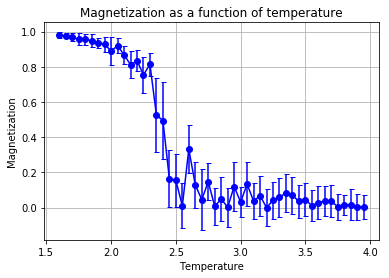

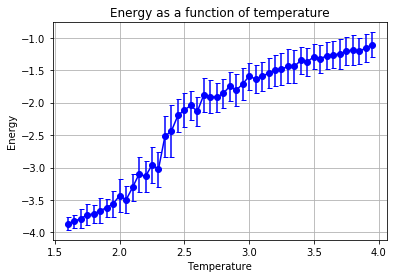

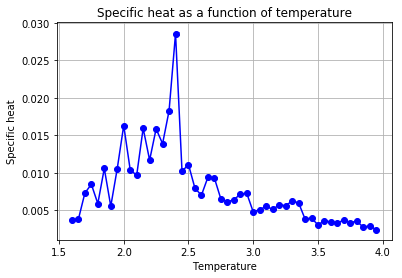

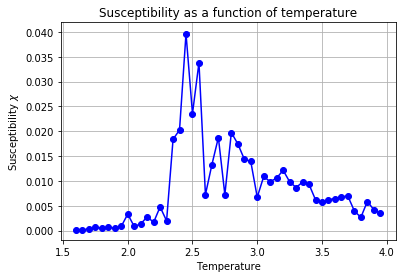

In [7]:
plt.title('Magnetization as a function of temperature')
plt.errorbar(temps, results[:, 0, 0], yerr=results[:, 0, 1], marker='o', capsize=2.5, color='b', ecolor='b')
plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.grid()

plt.figure()
plt.title('Energy as a function of temperature')
plt.errorbar(temps, results[:, 1, 0], yerr=results[:, 1, 1], marker='o', capsize=2.5, color='b', ecolor='b')
plt.xlabel('Temperature')
plt.ylabel('Energy')
plt.grid()

plt.figure()
plt.title('Specific heat as a function of temperature')
plt.errorbar(temps, results[:, 2, 0], yerr=results[:, 2, 1], marker='o', capsize=2.5, color='b', ecolor='b')
plt.xlabel('Temperature')
plt.ylabel('Specific heat')
plt.grid()

plt.figure()
plt.title('Susceptibility as a function of temperature')
plt.errorbar(temps, results[:, 3, 0], yerr=results[:, 3, 1], marker='o', capsize=2.5, color='b', ecolor='b')
plt.xlabel('Temperature')
plt.ylabel('Susceptibility $\chi$')
plt.grid()

plt.show()

(128, 128)


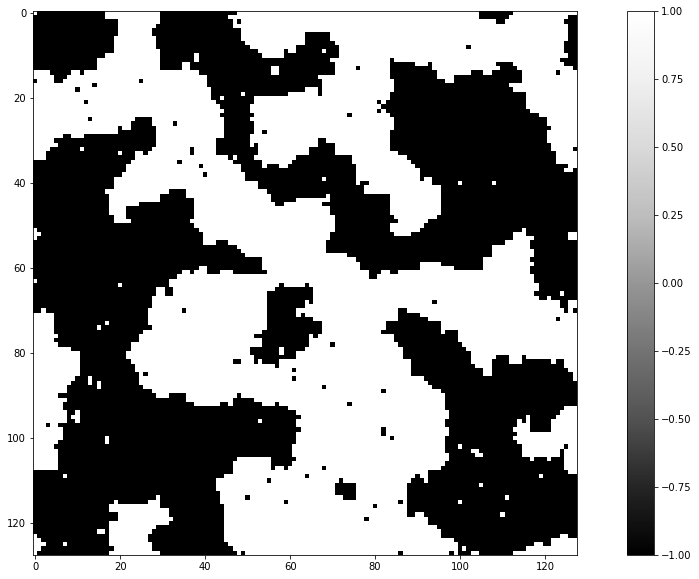

In [5]:
grid = simulate(1.5, 10**6-1, 10**6, N=128)[0][-1, :, :]
print(grid.shape)
plt.figure(figsize=(18, 10))
plt.imshow(grid, cmap='Greys_r')
plt.colorbar()